# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")
 
# Display the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [73]:
# Checking the number of mice.
unique_mice = merged_data["Mouse ID"].nunique()
unique_mice

249

In [74]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_check = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mouse_ids = duplicate_check["Mouse ID"].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [75]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mouse_data = merged_data[merged_data["Mouse ID"].isin(duplicate_mouse_ids)]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [76]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[~merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
cleaned_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [77]:
# Checking the number of mice in the clean DataFrame.
updated_unique_mice = cleaned_data["Mouse ID"].nunique()
updated_unique_mice

249

## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_satistics = pd.DataFrame({
    "Mean": mean_tumor,
    "Median": median_tumor,
    "Variance": variance_tumor,
    "StdDev": stddev_tumor,
    "SEM": sem_tumor
}).reset_index
summary_satistics

<bound method DataFrame.reset_index of                    Mean     Median   Variance    StdDev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398>

In [79]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_summary_statistics = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean = "mean",
    Median = "median",
    Variance = "var",
    StdDev = "std",
    SEM = "sem"
).reset_index
agg_summary_statistics

<bound method DataFrame.reset_index of                    Mean     Median   Variance    StdDev       SEM
Drug Regimen                                                     
Capomulin     40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479  8.134708  0.596466
Placebo       54.033581  52.288934  61.168083  7.821003  0.581331
Propriva      52.458254  50.854632  44.053659  6.637293  0.540135
Ramicane      40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355  6.966589  0.516398>

## Bar and Pie Charts

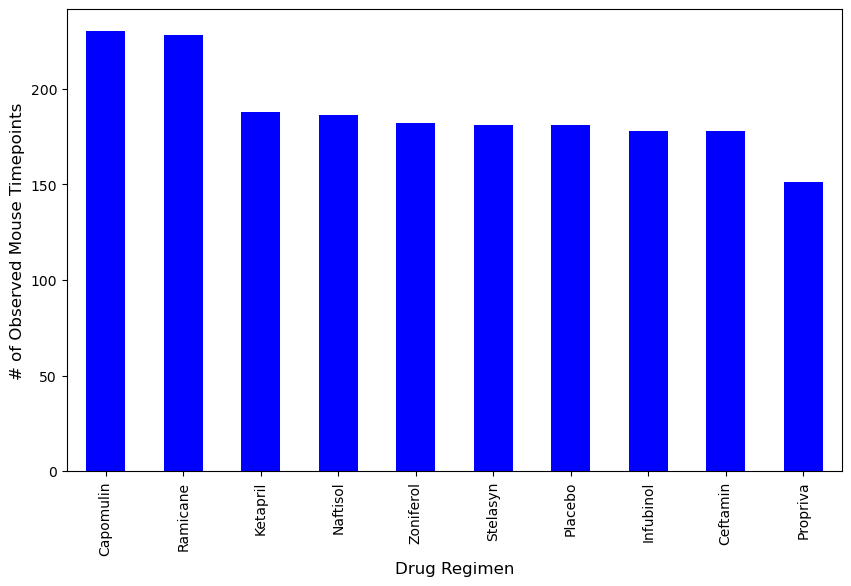

In [80]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_counts = cleaned_data["Drug Regimen"].value_counts()
mouse_counts.plot(kind="bar", figsize=(10, 6), color="blue")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12)
plt.xticks(rotation=90)
plt.show()

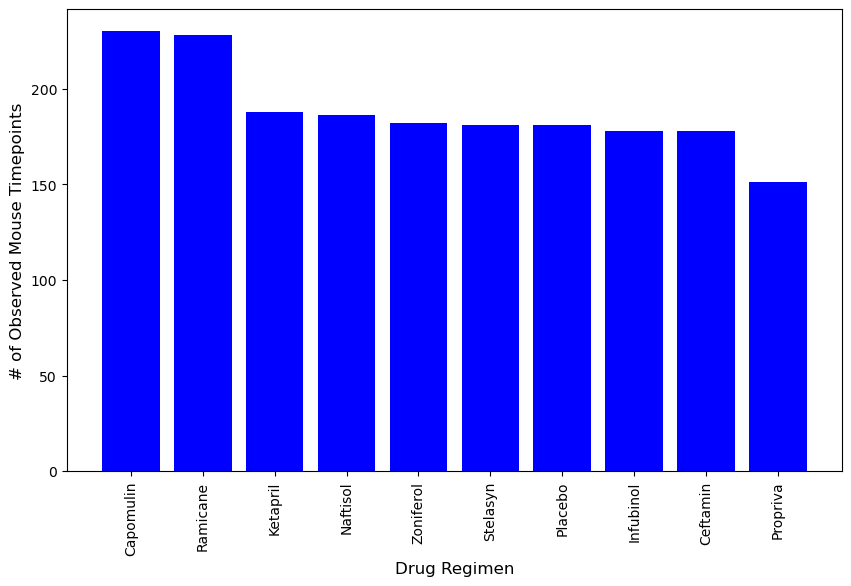

In [81]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(10, 6))
plt.bar(mouse_counts.index, mouse_counts.values, color="blue")
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("# of Observed Mouse Timepoints", fontsize=12)
plt.xticks(rotation=90)
plt.show()


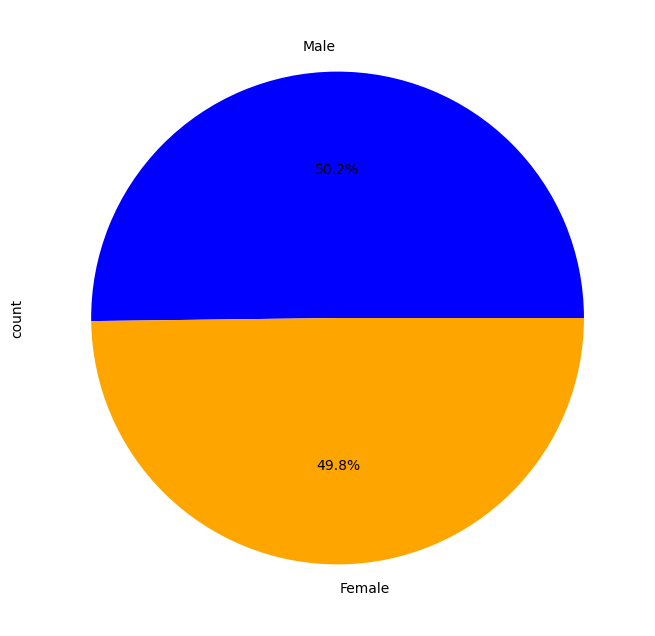

In [82]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = cleaned_data.drop_duplicates(subset="Mouse ID")["Sex"].value_counts()

# Make the pie chart
gender_counts.plot(kind="pie", autopct="%1.1f%%", figsize=(8, 8), colors=["blue", "orange"], startangle=0)

plt.show()

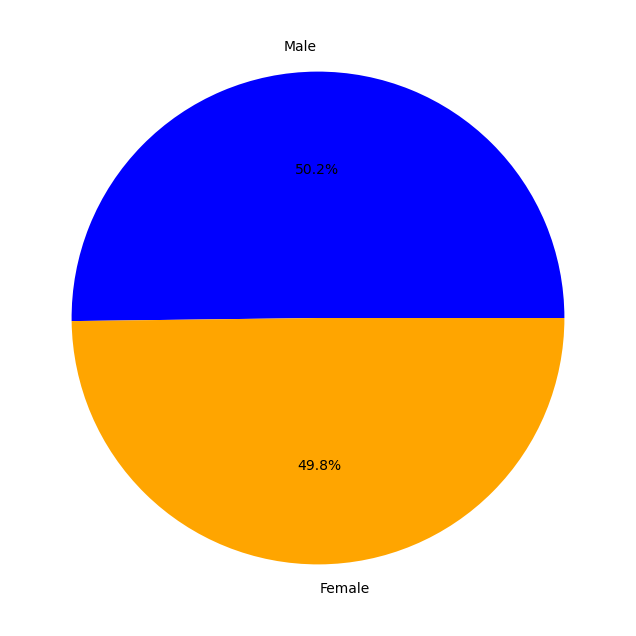

In [83]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", colors=["blue", "orange"], startangle=0)
plt.show()

## Quartiles, Outliers and Boxplots

In [84]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_volumes = pd.merge(last_timepoints, cleaned_data, on=["Mouse ID", "Timepoint"])

In [85]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_volumes = last_tumor_volumes[last_tumor_volumes["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_volume_data.append(treatment_volumes)

    # add subset
    quartiles = treatment_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_volumes[(treatment_volumes < lower_bound) | (treatment_volumes > upper_bound)]
    print(f"{treatment} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


C:\Users\caded\AppData\Local\Temp\ipykernel_2564\1163225571.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(tumor_volume_data, labels=treatments, flierprops={"marker": "o", "color": "red", "markersize": 10, "markerfacecolor": "red"})


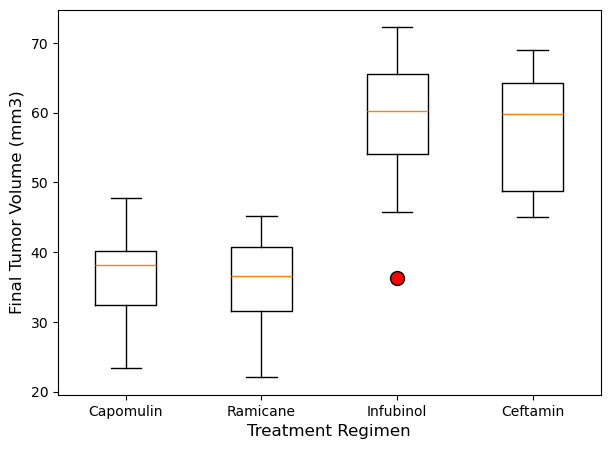

In [86]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(7, 5))
plt.boxplot(tumor_volume_data, labels=treatments, flierprops={"marker": "o", "color": "red", "markersize": 10, "markerfacecolor": "red"})
plt.xlabel("Treatment Regimen", fontsize=12)     
plt.ylabel("Final Tumor Volume (mm3)", fontsize=12)
plt.show()                                                       

## Line and Scatter Plots

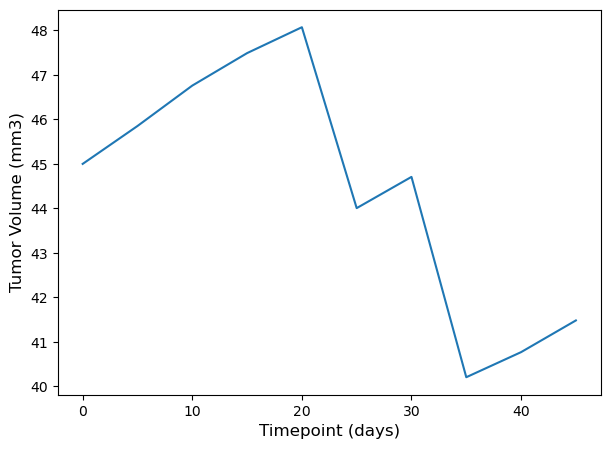

In [87]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse = capomulin_data[capomulin_data["Mouse ID"] == "l509"]

plt.figure(figsize=(7, 5))
plt.plot(single_mouse["Timepoint"], single_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)", fontsize=12)
plt.ylabel("Tumor Volume (mm3)", fontsize=12)
plt.show()

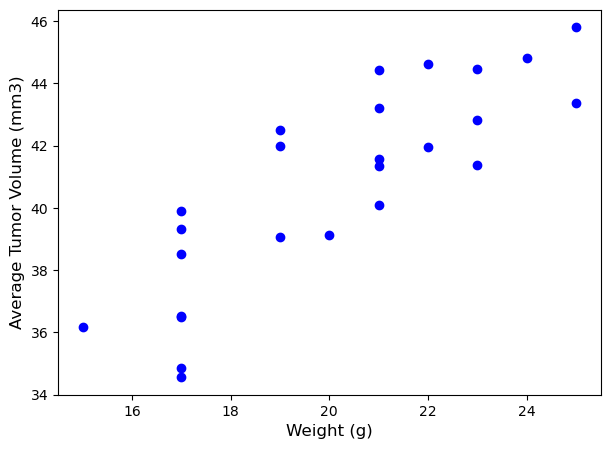

In [88]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg_volume = capomulin_data.groupby("Mouse ID").agg(
    Avg_Tumor_Vol=("Tumor Volume (mm3)", "mean"),
    Weight = ("Weight (g)", "first")
)

plt.figure(figsize=(7, 5))
plt.scatter(capomulin_avg_volume["Weight"], capomulin_avg_volume["Avg_Tumor_Vol"], color="blue")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694722


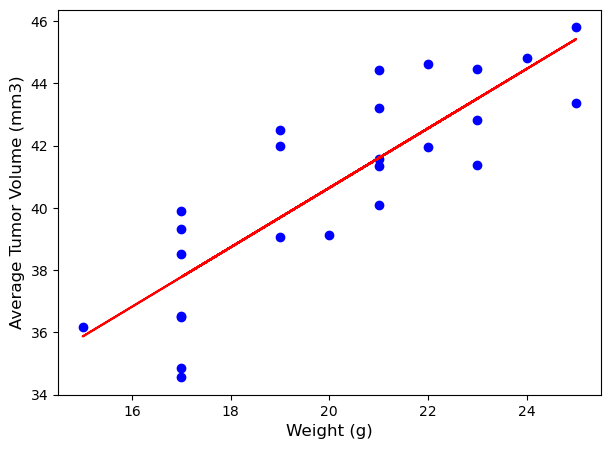

In [89]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

x_values = capomulin_avg_volume["Weight"]
y_values = capomulin_avg_volume["Avg_Tumor_Vol"]

correlation = x_values.corr(y_values)

slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

print(f"The correlation between mouse weight and average tumor volume is {correlation}")

plt.figure(figsize=(7, 5))
plt.scatter(x_values, y_values, color="blue")
plt.plot(x_values, slope * x_values + intercept, color="red")
plt.xlabel("Weight (g)", fontsize=12)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=12)
plt.show()